<a href="https://colab.research.google.com/github/anishgin/Big-Data-/blob/main/AICV_SIMPLILEARN/AI_CV_Simplilearn_00_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 00 - Basic Image Preprocessing 
Using Keras Preprocessing
1. Array to Image
2. Image to Array
3. Mnist Data set of keras
4. Normalize the image



In [3]:
import tensorflow as tf

In [4]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt


Get files from Git hub directory  

In [20]:
!wget -O car.jpg https://raw.githubusercontent.com/anishgin/Big-Data-/main/AICV_SIMPLILEARN/TN_red_car_cartoon_01.jpg

--2022-04-06 04:17:33--  https://raw.githubusercontent.com/anishgin/Big-Data-/main/AICV_SIMPLILEARN/TN_red_car_cartoon_01.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35874 (35K) [image/jpeg]
Saving to: ‘car.jpg’

car.jpg             100%[===================>]  35.03K  --.-KB/s    in 0s      

2022-04-06 04:17:33 (83.1 MB/s) - ‘car.jpg’ saved [35874/35874]



In [2]:
!ls

sample_data  TN_red_car_cartoon_01.jpg


code 

In [21]:
#path='TN_red_car_cartoon_01.jpg'
path=r'car.jpg'

In [22]:
car_image = load_img(path)

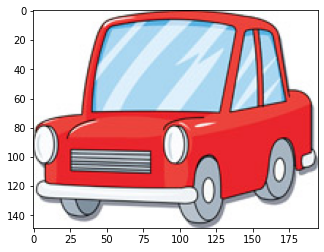

In [23]:
plt.imshow(car_image)

In [24]:
car_image.mode

'RGB'

In [25]:
car_image.size

(195, 149)

Image to Array - Preprocessing 

In [26]:
from keras.preprocessing.image import img_to_array

In [27]:
car_image_array = img_to_array(car_image)
car_image_array

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [28]:
car_image_array.shape

(149, 195, 3)

In [29]:
car_image_array.dtype

dtype('float32')

Array to Image 

In [30]:
from keras.preprocessing.image import array_to_img

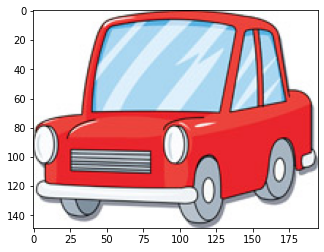

In [31]:
car_from_array = array_to_img(car_image_array)
plt.imshow(car_from_array)

## Mnist Data  set

In [32]:
from keras.datasets import mnist

In [60]:
#Unpack into train & test
(trainX, trainY),(testX, testY) = mnist.load_data()

In [37]:
trainX.shape  # 60K Images with 28*28 (784 pixel size) resolution 

(60000, 28, 28)

In [38]:
trainX[0].shape

(28, 28)

In [42]:
testX.shape

(10000, 28, 28)

In [47]:
trainX.mean(),  trainX.min(), trainX.max(), trainX.std()

(33.318421449829934, 0, 255, 78.56748998339798)

Visulize image 

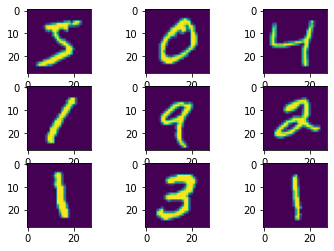

In [51]:
for i in range(9):
  plt.subplot(330 + i+1)  #Same as 3,3,i+1
  plt.imshow(trainX[i])

Normalize the Image

In [52]:
#ImageData Generator
from keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(rescale=1.0/255.0)

Reshape to Add the Channel (X,Y, Channel)

In [59]:
trainX_RS = trainX.reshape(trainX.shape[0], trainX.shape[1], trainX.shape[2], 1) #The last one for channel 
testX_RS = testX.reshape(testX.shape[0], testX.shape[1], testX.shape[2], 1) #The last one for channel 
trainX_RS.shape, testX_RS.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [61]:
#Iterators
train_iter = img_gen.flow(trainX_RS, trainY, batch_size=64)
test_iter = img_gen.flow(testX_RS, testY, batch_size=64)

In [62]:
len(train_iter), len(test_iter)  # 938 batches of 64 images

(938, 157)

In [63]:
batchX, batchY = train_iter.next()

In [64]:
batchX.min(), batchX.max()

(0.0, 1.0)

In [65]:
batchY.min(), batchY.max()

(0, 9)